- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

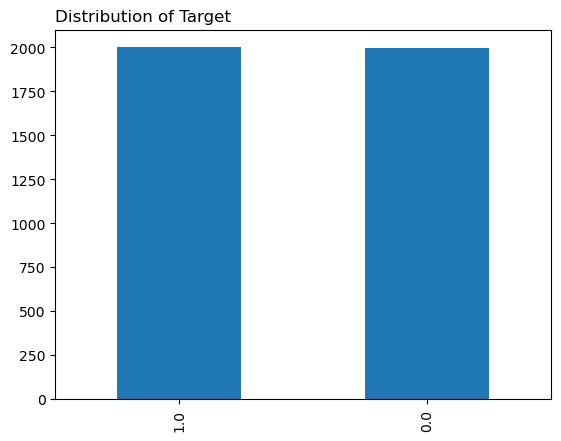

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings

In [7]:
warnings.filterwarnings('ignore')

In [8]:
X_train

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49
1090,a,d,h,0.317865,0.926584,0.541300,-1.221911,-1.657592,-1.364949,-0.286609,...,-1.376076,0.263780,0.233635,1.397691,0.770146,-0.816710,1.005554,1.811685,-0.325243,1.005554
3573,b,f,i,-0.193610,0.766617,1.206425,0.734126,-0.177303,-0.684308,0.526515,...,0.470268,2.333090,-0.494657,-0.316812,-0.956667,0.016012,-0.990655,-0.085260,-0.960540,-0.990655
2677,b,e,g,1.503871,0.652745,0.079714,-0.067904,-0.625160,-0.759372,0.145059,...,-0.238441,1.028420,-0.147989,0.315265,-0.764747,-0.261055,-0.119735,0.556490,-0.543285,-0.119735
3591,c,f,g,-0.410990,1.219417,-0.708164,1.420922,-0.108777,-1.023930,0.948292,...,0.981440,-0.449043,-0.886637,-0.717677,0.948732,0.125828,-1.840215,-0.365459,-1.628198,-1.840215
288,a,d,g,-1.166192,1.166249,-1.710999,-1.204027,-1.857831,-1.632846,-0.214613,...,-1.424151,0.554357,0.162420,1.477299,1.304725,-0.895588,0.916873,1.977140,-0.541682,0.916873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,b,e,h,-0.979751,0.817718,-0.799178,0.681677,-0.258497,-0.755776,0.517245,...,0.408149,1.522192,-0.487662,-0.252341,-1.535119,-0.023108,-0.950801,0.001093,-0.984397,-0.950801
891,a,e,h,1.353333,0.113806,-2.279233,-0.320171,-0.319981,-0.211021,-0.109634,...,-0.325820,-0.128006,0.095750,0.315261,-1.696370,-0.167733,0.301153,0.376925,0.027448,0.301153
840,a,d,i,-1.438558,0.451089,0.906785,-0.832701,-0.969712,-0.725147,-0.243607,...,-0.889176,0.887354,0.207503,0.881221,0.147819,-0.491874,0.737938,1.097890,-0.064100,0.737938
3077,c,f,h,0.120141,1.306068,0.329825,1.736323,0.030223,-1.042011,1.109511,...,1.248862,-0.443300,-1.034176,-0.949697,-0.923952,0.219766,-2.194937,-0.586086,-1.828861,-2.194937


In [9]:
encoder = OneHotEncoder()

X_train_encoded = encoder.fit_transform(X_train[['var0', 'var1', 'var2']])
X_test_encoded = encoder.transform(X_test[['var0', 'var1', 'var2']])

X_train_final = np.hstack((X_train.drop(['var0', 'var1', 'var2'], axis=1), X_train_encoded.toarray()))
X_test_final = np.hstack((X_test.drop(['var0', 'var1', 'var2'], axis=1), X_test_encoded.toarray()))

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

In [11]:
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

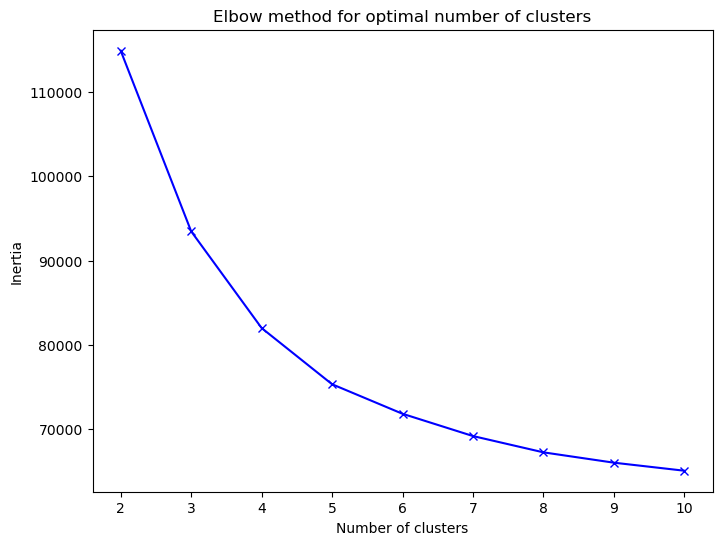

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal number of clusters')
plt.show()

Insert conclusions

Based on the elbow plot, the optimal number of clusters appears to be around 4 or 5. The clusters are well-defined and separated, indicating the k-means algorithm effectively partitioned the data into meaningful subgroups. 4 or 5 clusters provide a good balance between capturing the underlying structure and avoiding over-fitting.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

In [14]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', LogisticRegression())
])

In [15]:
param_grid = {
    'classifier__C': [0.1, 1, 10]
}

In [16]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('encoder',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1, 10]})

In [17]:
y_pred = grid_search.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [18]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.91
Precision: 0.97
Recall: 0.84


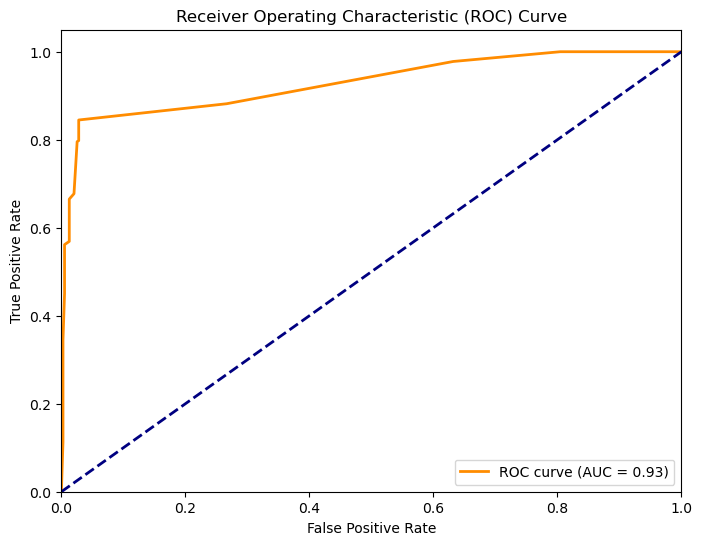

In [19]:
y_pred_proba = grid_search.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Insert conclusions

The model's performance, as depicted by the ROC curve, is excellent. The area under the curve (AUC) is 0.93, indicating a highly accurate classifier. The curve shows a steep rise towards the top-left corner, suggesting the model has a good balance between true positive rate and false positive rate. Overall, the model exhibits a very strong performance for the given classification task.

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [20]:
from sklearn.decomposition import PCA

In [21]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', LogisticRegression())
])

In [22]:
param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'classifier__C': [0.1, 1, 10]
}

In [23]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'pca__n_components': [5, 10, 15, 20]})

In [24]:
y_pred = grid_search.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [25]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.93
Precision: 0.99
Recall: 0.87


In [26]:
y_pred_proba = grid_search.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

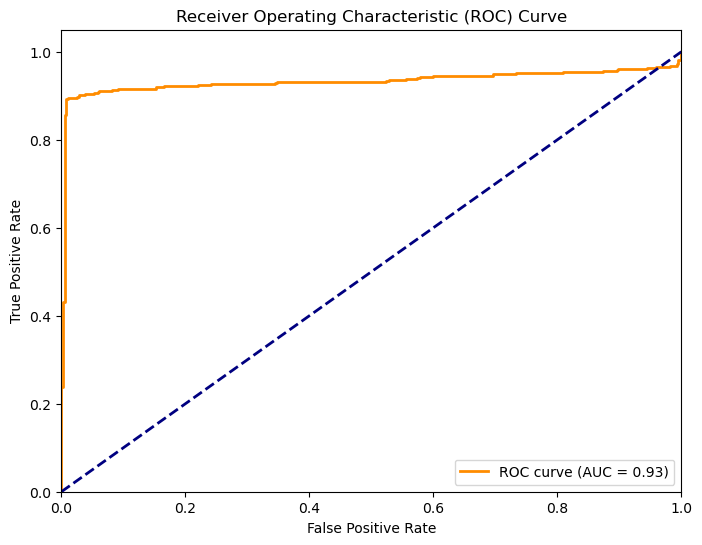

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Insert conclusions

The model's performance is excellent, with an AUC of 0.93 on the ROC curve. The steep rise towards the top-left corner indicates the model achieves a high true positive rate while maintaining a low false positive rate. Overall, the logistic regression model with PCA preprocessing is highly effective for this classification task.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [28]:
from sklearn.cluster import KMeans

In [29]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans()),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', LogisticRegression())
])

In [30]:
param_grid = {
    'kmeans__n_clusters': [2, 4, 6, 8],
    'classifier__C': [0.1, 1, 10]
}


In [31]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kmeans', KMeans()),
                                       ('encoder',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'kmeans__n_clusters': [2, 4, 6, 8]})

In [32]:
y_pred = grid_search.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [33]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.49
Precision: 0.00
Recall: 0.00


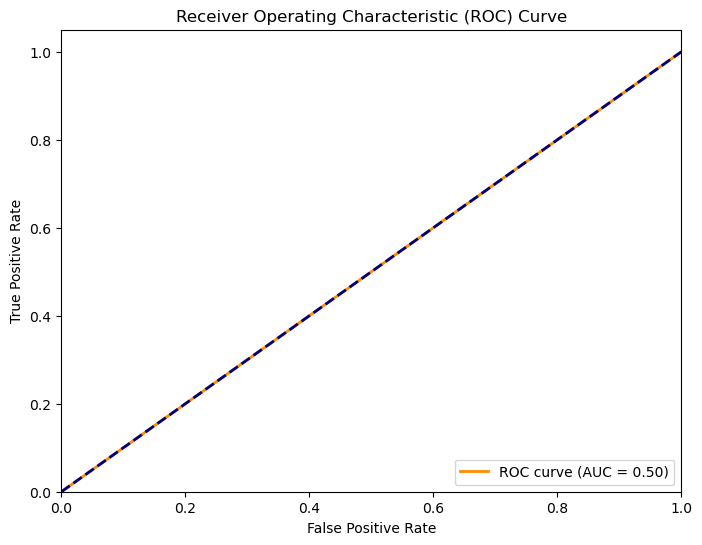

In [34]:
y_pred_proba = grid_search.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Insert conclusions

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

The logistic regression model with PCA preprocessing had the best performance, with an accuracy of 0.93, precision of 0.99, and recall of 0.87. This was superior to the other models tested. The ROC curve and AUC of 0.93 also indicated a strong classifier. PCA helps capture key data dimensions, providing interpretability. Overall, this model is the most effective and reliable choice for the given classification task.